In [0]:
import pandas as pd

import datetime 

import nltk, string
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from collections import Counter

import matplotlib.pyplot as plt

import calendar

stemming = PorterStemmer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
import nltk
nltk.download("stopwords")
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
def token_stem(df,lan="english"):
    stop_words = stopwords.words(lan)
    df["Text"] = df["Text"].apply(lambda x: x.replace("#","") ) #remove hastags
    df["Text"] = df["Text"].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
    df["list_words"] = df["Text"].apply(lambda x: x.split(" ") if len(x.split(" "))>1 else "Unknown") #tokenize
     #remove stopwords
    df["list_words"]= df['list_words'].apply(lambda x: [stemming.stem(w) for w in x if not w in stop_words]) #stem
    df["list_words"]= df['list_words'].apply(lambda x: [w for w in x if w not in (stop_words,"","the")])
 
    return(df)

In [0]:
def words_occ(df,n):
    words = {}
    for i in df["list_words"]:
        for w in i:
            if w not in words.keys():
                words[w] = 1
            else:
                words[w]+=1
    print(Counter(words).most_common()[:n])
    

In [0]:
is_feeling = ["I'm","I","am","feeling","me","myself","my","mine"]

In [0]:
Fear=["afraid", "scared", "frightened", "nervous", "jittery", "shaky"]
Hostility=["angry","hostile", "irritable", "scornful", "disgusted", "loathing"]
Guilt=["guilty","ashamed", "blameworthy", "angry at self", "disgusted with self", "dissatisfied with self"]
Sadness= ["sad", "blue", "downhearted", "alone", "lonely"]

Joviality= ["happy", "joyful", "delighted", "cheerful", "excited", "enthusiastic", "lively", "energetic"]
Self_assurance=["proud", "strong","confident", "bold", "daring", "fearless"]
Attentiveness=["alert", "attentiveness", "concentrating", "determined"]

Shyness=["shy", "bashful", "sheepish","timid"]
Fatigue=["sleepy", "tired", "sluggish", "drowsy"]
Serenity =["calm","relaxed","at ease"]
Surprise= ["amazed", "surprised", "astonished"]

list_of_list = ["Fear","Hostility","Guilt","Sadness","Joviality","Self_assurance","Attentiveness","Shyness","Fatigue","Serenity","Surprise"]

In [0]:
def contains_feeling(df,lan):
    if lan=="french":
        is_feeling = ["Je","J'ai","J'","pense","souhaite","moi","me","nous","nos","mien"]
    else:
        is_feeling = ["I'm","I","am","feeling","me","myself","my","mine"]
        
    df["contains_feeling"]=df["list_words"].apply(lambda x: any(w in s for s in is_feeling for w in x))
    return(df)

In [0]:
def match_sentiment(s,lan):
    list_of_list = ["Fear","Hostility","Guilt","Sadness","Joviality","Self_assurance","Attentiveness","Shyness","Fatigue","Serenity","Surprise"]
        
    if lan=="french":
        Fear=["effrayé", "peur", "nerveux", "terrifié","soucieux","horrifié"]
        Hostility=["enervé","hostile", "irrité", "dégouté","rageur","dédaigneux"]
        Guilt=["coupable","honteux", "repentant", "dégouté de moi","répréhensible"]
        Sadness= ["triste", "seul", "malheureux","piteux","peiné"]

        Joviality= ["heureux", "joyeux", "enchanté", "gai","excité", "enthousiaste", "vivant", "energique"]
        Self_assurance=["fier", "fort","confiant", "brave", "audacieux", "courageux"]
        Attentiveness=["alerte", "attentif", "concentré", "determiné"]

        Shyness=["timide","craintif","timoré","penaud"]
        Fatigue=["fatigué", "endormi","somnolent","paresseux"]
        Serenity =["calme","relaxé","en paix"]
        Surprise= ["emerveillé", "surpris", "abasourdi"]
    
    elif lan=="english":

        Fear=["afraid", "scared", "frightened", "nervous", "jittery", "shaky"]
        Hostility=["angry","hostile", "irritable", "scornful", "disgusted", "loathing"]
        Guilt=["guilty","ashamed", "blameworthy", "angry at self", "disgusted with self", "dissatisfied with self"]
        Sadness= ["sad", "blue", "downhearted", "alone", "lonely"]

        Joviality= ["happy", "joyful", "delighted", "cheerful", "excited", "enthusiastic", "lively", "energetic"]
        Self_assurance=["proud", "strong","confident", "bold", "daring", "fearless"]
        Attentiveness=["alert", "attentiveness", "concentrating", "determined"]

        Shyness=["shy", "bashful", "sheepish","timid"]
        Fatigue=["sleepy", "tired", "sluggish", "drowsy"]
        Serenity =["calm","relaxed","at ease"]
        Surprise= ["amazed", "surprised", "astonished"]
        
    a = []
    for word in s:
        a = [l for l in list_of_list for w in eval(l) if word in w]
        if a != []:
            return(a[0])
    return("Unknown")

In [0]:
value_names = ["Fear","Sadness",'Guilt',"Hostility","Shyness","Fatigue","Surprise","Joviality","Self-assurance","Attentiveness","Serenity"]
alpha_s = [0.0063791,0.0086279,0.0021756,0.0018225,0.0007608,0.0240757,0.0084612,0.0182421,0.0036012,0.0008997,0.0022914]

In [0]:
def panas_t_formula(alpha,beta):
  if beta<=alpha:
    return ( (beta-alpha) / alpha )
  else:
    return ( (beta-alpha) / beta )

In [0]:
def panas_t_calc_2(df,t,level="week",lang="english"):
    if lang=="english":
      n = len(df_tweets_feeling_en)
    else:
      n = len(df_tweets_feeling_fr)
    betha_s = []
    count_val = []
    for i in value_names:
        val = 0
        try:
            val = df["main_emotion"].value_counts()[i]
            betha_s.append(val/n)
            count_val.append(val)
        except:
            betha_s.append(0)
            count_val.append(val)
    results = pd.DataFrame({"emotion":value_names,"alpha":alpha_s,"betha":betha_s,"occurences":count_val})
    results["panas-t"] = results.apply(lambda x: panas_t_formula(x["alpha"],x["betha"]) ,axis=1)
    if level =="month":
      results["month"]=t
      results['month_name'] = results['month'].apply(lambda x: calendar.month_abbr[x])
    else:
      results["week"]= t
      results["first_day_of_week"]=results["week"].apply(lambda x: datetime.datetime.strptime("2020-W"+str(x) + '-1', "%Y-W%W-%w"))

    return(results)

# Process Data

In [0]:
tweets_fr = pd.read_csv("/content/tweets_more_fr_quebec.csv",parse_dates=["Datetime"])

In [0]:
tweets_fr.shape

(7998, 10)

In [0]:
df_tweets_tok = token_stem(tweets_fr,"french")
words_occ(df_tweets_tok,5)
tweets_en_feel = contains_feeling(df_tweets_tok,"french")
df_tweets_feeling = tweets_en_feel[tweets_en_feel.contains_feeling]
df_tweets_feeling["main_emotion"]= df_tweets_feeling["list_words"].apply(lambda x: match_sentiment(x,"french"))
df_tweets_feeling_fr = df_tweets_feeling[(df_tweets_feeling.main_emotion!="Unknown")]
df_tweets_feeling_fr["month"]= df_tweets_feeling_fr["Datetime"].dt.month
df_tweets_feeling_fr["week"]= df_tweets_feeling_fr["Datetime"].dt.week
df_tweets_feeling_fr['month_name'] = df_tweets_feeling_fr['month'].apply(lambda x: calendar.month_abbr[x])
df_tweets_feeling_fr["first_day_of_week"]=df_tweets_feeling_fr["week"].apply(lambda x: datetime.datetime.strptime("2020-W"+str(x) + '-1', "%Y-W%W-%w"))
df_tweets_feeling_fr.shape

[('covid19', 6589), ('covid', 1447), ('a', 1398), ('plu', 1061), ('Le', 911)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

(1767, 17)

In [0]:
tweets_en = pd.read_csv("/content/tweets_more_en_quebec.csv",parse_dates=["Datetime"])
tweets_en.shape

(13117, 10)

In [0]:
df_tweets_tok = token_stem(tweets_en,"english")
words_occ(df_tweets_tok,5)
tweets_en_feel = contains_feeling(df_tweets_tok,"english")
df_tweets_feeling = tweets_en_feel[tweets_en_feel.contains_feeling]
df_tweets_feeling["main_emotion"]= df_tweets_feeling["list_words"].apply(lambda x: match_sentiment(x,"english"))
df_tweets_feeling_en = df_tweets_feeling[(df_tweets_feeling.main_emotion!="Unknown")]
df_tweets_feeling_en["month"]= df_tweets_feeling_en["Datetime"].dt.month
df_tweets_feeling_en["week"]= df_tweets_feeling_en["Datetime"].dt.week
df_tweets_feeling_en['month_name'] = df_tweets_feeling_en['month'].apply(lambda x: calendar.month_abbr[x])
df_tweets_feeling_en["first_day_of_week"]=df_tweets_feeling_en["week"].apply(lambda x: datetime.datetime.strptime("2020-W"+str(x) + '-1', "%Y-W%W-%w"))
df_tweets_feeling_en.shape

[('covid19', 7597), ('pandem', 3031), ('I', 2712), ('covid', 2522), ('peopl', 1251)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

(1240, 17)

# Tweets 

In [0]:
tweets_en["month"]= tweets_en["Datetime"].dt.month

tweets_en["week"]= tweets_en["Datetime"].dt.week
tweets_en["first_day_of_week"]=tweets_en["week"].apply(lambda x: datetime.datetime.strptime("2020-W"+str(x) + '-1', "%Y-W%W-%w"))

tweets_fr["month"]= tweets_fr["Datetime"].dt.month
tweets_fr["week"]= tweets_fr["Datetime"].dt.week
tweets_fr["first_day_of_week"]=tweets_fr["week"].apply(lambda x: datetime.datetime.strptime("2020-W"+str(x) + '-1', "%Y-W%W-%w"))


In [0]:
tweets_en.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Datetime', 'Text', 'Username',
       'Retweets', 'Mentions', 'Reply', 'Link', 'Region', 'list_words',
       'contains_feeling', 'month', 'week', 'first_day_of_week'],
      dtype='object')

In [0]:
tweets_en_count = tweets_en.groupby(["week","first_day_of_week"]).count()["Text"].reset_index()

In [0]:
tweets_fr_count = tweets_fr.groupby(["week","first_day_of_week"]).count()["Text"].reset_index()
tweets_fr_count["lang"]="french"
tweets_en_count["lang"]="english"

In [0]:
df = pd.concat([tweets_fr_count,tweets_en_count],axis=0)
df.to_csv("counts_tweet.csv")

In [0]:
tweets_fr_count.to_csv("tweets_fr_count.csv")
tweets_en_count.to_csv("tweets_en_count.csv")

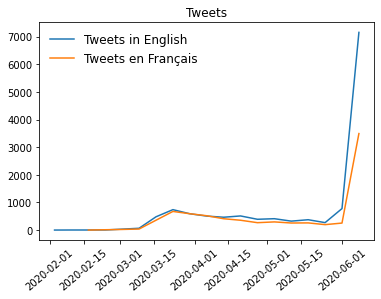

In [0]:
plt.plot(tweets_en_count.first_day_of_week,tweets_en_count.Text,label="Tweets in English")
plt.plot(tweets_fr_count.first_day_of_week,tweets_fr_count.Text,label="Tweets en Français")
plt.legend(loc='best',frameon=False,prop={'size': 12})
plt.title("Tweets")
plt.xticks(rotation=40)
plt.show()

# Sentiment Occurences

Monthly Occurence

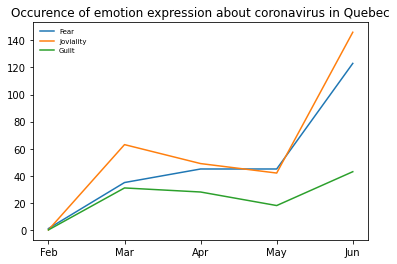

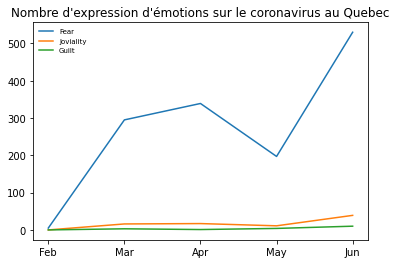

In [0]:
level="month"
results_fr = pd.DataFrame()
results_en = pd.DataFrame()
for i in df_tweets_feeling_en["Datetime"].dt.month.unique():
    df = df_tweets_feeling_fr[df_tweets_feeling_fr["Datetime"].dt.month==i]
    results_fr = pd.concat([results_fr,panas_t_calc_2(df,i,level,'french')])
    df = df_tweets_feeling_en[df_tweets_feeling_en["Datetime"].dt.month==i]
    results_en = pd.concat([results_en,panas_t_calc_2(df,i,level,'english')])
emotions_selected = ["Fear","Joviality","Guilt"]


for e in emotions_selected:
    df_en = results_en[results_en.emotion == e]
    df_en = df_en.sort_values('month', ascending = True).reset_index(drop=True)
    
    plt.plot(df_en.month_name,df_en["occurences"],label=e)
plt.title("Occurence of emotion expression about coronavirus in Quebec")
plt.legend(loc='best',frameon=False,prop={'size': 7})
plt.show()

for e in emotions_selected:
    df_fr = results_fr[results_fr.emotion == e]
    df_fr = df_fr.sort_values('month', ascending = True).reset_index(drop=True)
    plt.plot(df_fr.month_name,df_fr["occurences"],label=e)

plt.legend(loc='best',frameon=False,prop={'size': 7})
plt.title("Nombre d'expression d'émotions sur le coronavirus au Quebec")
plt.show()

Weekly occurence

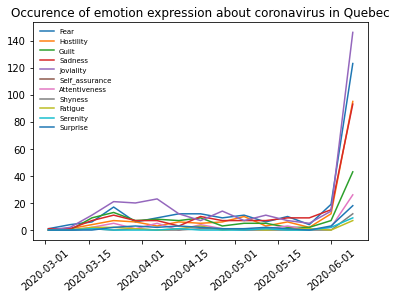

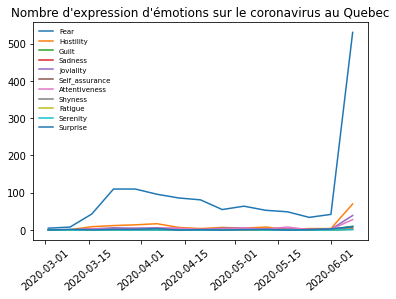

In [0]:
level="weekly"
results_fr = pd.DataFrame()
results_en = pd.DataFrame()
for i in df_tweets_feeling_en["Datetime"].dt.week.unique():
    df = df_tweets_feeling_fr[df_tweets_feeling_fr["Datetime"].dt.week==i]
    results_fr = pd.concat([results_fr,panas_t_calc_2(df,i,level,'french')])
    df = df_tweets_feeling_en[df_tweets_feeling_en["Datetime"].dt.week==i]
    results_en = pd.concat([results_en,panas_t_calc_2(df,i,level,'english')])
emotions_selected = ["Fear","Hostility","Guilt","Sadness","Joviality","Self_assurance","Attentiveness","Shyness","Fatigue","Serenity","Surprise"]

results_en.to_csv("panas_en_f.csv")
results_fr.to_csv("panas_fr_f.csv")
for e in emotions_selected:
    df_en = results_en[results_en.emotion == e]
    df_en = df_en.sort_values('week', ascending = True).reset_index(drop=True)
    
    plt.plot(df_en.first_day_of_week,df_en["occurences"],label=e)
plt.title("Occurence of emotion expression about coronavirus in Quebec")
plt.legend(loc='best',frameon=False,prop={'size': 7})
plt.xticks(rotation=40)
plt.show()

for e in emotions_selected:
    df_fr = results_fr[results_fr.emotion == e]
    df_fr = df_fr.sort_values('week', ascending = True).reset_index(drop=True)
    plt.plot(df_fr.first_day_of_week,df_fr["occurences"],label=e)

plt.legend(loc='best',frameon=False,prop={'size': 7})
plt.title("Nombre d'expression d'émotions sur le coronavirus au Quebec")
plt.xticks(rotation=40)
plt.show()